## Raw Input Data

The data you'll be working with has been preprocessed from CSVs that looks like this:

| timestamp | displacement  | yaw_rate | acceleration |
| :-------: | :----------: | :------: | :----------: |
| 0.0 | 0 | 0.0 | 0.0 |
| 0.25 | 0.0 | 0.0 | 19.6 |
| 0.5 | 1.225 | 0.0 | 19.6 |
| 0.75 | 3.675 | 0.0 | 19.6 |
| 1.0 | 7.35 | 0.0 | 19.6 |
| 1.25 | 12.25 | 0.0 | 0.0 |
| 1.5 | 17.15 | -2.82901631903 | 0.0 |
| 1.75 | 22.05 | -2.82901631903 | 0.0 |
| 2.0 | 26.95 | -2.82901631903 | 0.0 |
| 2.25 | 31.85 | -2.82901631903 | 0.0 |
| 2.5 | 36.75 | -2.82901631903 | 0.0 |
| 2.75 | 41.65 | -2.82901631903 | 0.0 |
| 3.0 | 46.55 | -2.82901631903 | 0.0 |
| 3.25 | 51.45 | -2.82901631903 | 0.0 |
| 3.5 | 56.35 | -2.82901631903 | 0.0 |

This data is currently saved in a file called `trajectory_example.pickle`. It can be loaded using a helper function we've provided (demonstrated below):

In [56]:
from helpers import process_data
%matplotlib inline

data_list = process_data("trajectory_example.pickle")

for entry in data_list:
    print(entry)

(0.0, 0, 0.0, 0.0)
(0.25, 0.0, 0.0, 19.600000000000001)
(0.5, 1.2250000000000001, 0.0, 19.600000000000001)
(0.75, 3.6750000000000003, 0.0, 19.600000000000001)
(1.0, 7.3500000000000005, 0.0, 19.600000000000001)
(1.25, 12.25, 0.0, 0.0)
(1.5, 17.149999999999999, -2.8290163190291664, 0.0)
(1.75, 22.049999999999997, -2.8290163190291664, 0.0)
(2.0, 26.949999999999996, -2.8290163190291664, 0.0)
(2.25, 31.849999999999994, -2.8290163190291664, 0.0)
(2.5, 36.749999999999993, -2.8290163190291664, 0.0)
(2.75, 41.649999999999991, -2.8290163190291664, 0.0)
(3.0, 46.54999999999999, -2.8290163190291664, 0.0)
(3.25, 51.449999999999989, -2.8290163190291664, 0.0)
(3.5, 56.349999999999987, -2.8290163190291664, 0.0)


as you can see, each entry in `data_list` contains four fields. Those fields correspond to `timestamp` (seconds), `displacement` (meters), `yaw_rate` (rads / sec), and `acceleration` (m/s/s).

### The Point of this Project!
**Data tells a story but you have to know how to find it!** 

Contained in the data above is all the information you need to reconstruct a fairly complex vehicle trajectory. After processing **this** exact data, it's possible to generate this plot of the vehicle's X and Y position:

![](https://d17h27t6h515a5.cloudfront.net/topher/2017/December/5a3044ac_example-trajectory/example-trajectory.png)

as you can see, this vehicle first accelerates forwards and then turns right until it almost completes a full circle turn.

### Data Explained

**`timestamp`** - Timestamps are all measured in seconds. The time between successive timestamps ($\Delta t$) will always be the same *within* a trajectory's data set (but not *between* data sets).

**`displacement`** - Displacement data from the odometer is in meters and gives the **total** distance traveled up to this point.

**`yaw_rate`** - Yaw rate is measured in radians per second with the convention that positive yaw corresponds to *counter-clockwise* rotation. 

**`acceleration`** - Acceleration is measured in $\frac{m/s}{s}$ and is always **in the direction of motion of the vehicle** (forward). 

> **NOTE** - you may not need to use all of this data when reconstructing vehicle trajectories.

## Your Job
Your job is to complete the following functions, all of which take a processed `data_list` (with $N$ entries, each $\Delta t$ apart) as input:

* `get_speeds` - returns a length $N$ list where entry $i$ contains the speed ($m/s$) of the vehicle at $t = i \times \Delta t$ 

* `get_headings` - returns a length $N$ list where entry $i$ contains the heading (radians, $0 \leq \theta < 2\pi$) of the vehicle at $t = i \times \Delta t$

* `get_x_y` - returns a length $N$ list where entry $i$ contains an `(x, y)` tuple corresponding to the $x$ and $y$ coordinates (meters) of the vehicle at $t = i \times \Delta t$ 

* `show_x_y` - generates an x vs. y scatter plot of vehicle positions. 

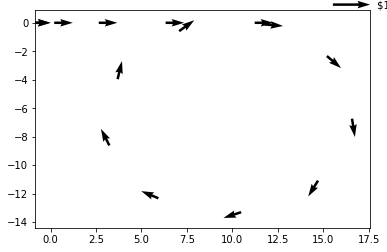

In [57]:
# I've provided a solution file called solution.py
# You are STRONGLY encouraged to NOT look at the code
# until after you have solved this yourself.
#
# You SHOULD, however, feel free to USE the solution 
# functions to help you understand what your code should
# be doing. For example...
from helpers import process_data
import solution

data_list = process_data("trajectory_example.pickle")
solution.show_x_y(data_list)

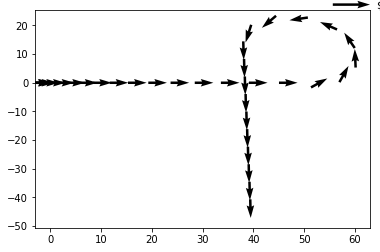

In [58]:
# What about the other trajectories?

three_quarter_turn_data = process_data("trajectory_1.pickle")
solution.show_x_y(three_quarter_turn_data, increment=10)

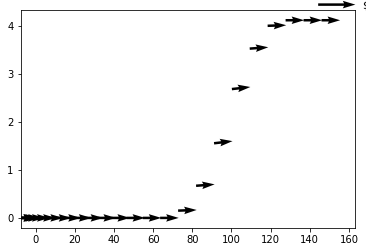

In [59]:
merge_data = process_data('trajectory_2.pickle')
solution.show_x_y(merge_data,increment=10)

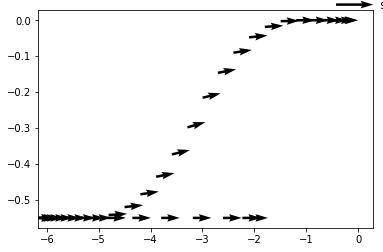

In [60]:
parallel_park = process_data("trajectory_3.pickle")
solution.show_x_y(parallel_park,increment=5)

**How do you make those cool arrows?!**

I did a Google search for "python plot grid of arrows" and the second result led me to some [demonstration code](https://matplotlib.org/examples/pylab_examples/quiver_demo.html) that was really helpful. 

## Testing Correctness
Testing code is provided at the bottom of this notebook. Note that only `get_speeds`, `get_x_y`, and `get_headings` are tested automatically. You will have to "test" your `show_x_y` function by manually comparing your plots to the expected plots. 

### Initial Vehicle State

The vehicle always begins with all state variables equal to zero. This means `x`, `y`, `theta` (heading), `speed`, `yaw_rate`, and `acceleration` are 0 at t=0.

----

## Your Code!
Complete the functions in the cell below. I recommend completing them in the order shown. Use the cells at the end of the notebook to test as you go.

In [92]:
from math import sin, cos, pi
import numpy as np
from matplotlib import pyplot as plt
def get_speeds(data_list):
    
    speeds = []
    timestamp, displacement, _, _ = data_list[0]
    previous_position = displacement
    previous_time = timestamp
    
    speeds.append(0)
    
    for i in range(1, len(data_list)):            
        timestamp, displacement, _ ,_ = data_list[i]
                
        delta_x = displacement - previous_position
        delta_t = timestamp - previous_time
        
        speed = delta_x / delta_t
        speeds.append(speed)
        
        previous_position = displacement
        previous_time = timestamp
        
    return speeds 

def get_headings(data_list):
    print(data_list[:5])
    headings = []    
    timestamp ,_ , yaw, _ = data_list[0]
    previous_yaw = yaw
    previous_time = timestamp
    headings.append(0)
    
    for i in range(1, len(data_list)):            
        time,_ , yaw, _ = data_list[i]        
        delta_t = time - previous_time        
        new_yaw = previous_yaw + yaw * delta_t
              
        # print(f'py {previous_yaw} y {yaw} new yaw {new_yaw} detka {delta_t} old time {previous_time} new time {time}')
        
        headings.append(new_yaw)
        previous_yaw = new_yaw
        previous_time = time
    return headings
  

def get_x_y(data_list):
    headings = get_headings(data_list)
    history = []
    x = 0
    y = 0
    previous_position = 0
    history.append((0,0))
    
    for i in range(1, len(data_list)):    
        time, displacement, yaw, _ = data_list[i]   
        
        delta_d = displacement - previous_position
        
        delta_x = delta_d * cos(headings[i])
        delta_y = delta_d * sin(headings[i])

        new_x = x + delta_x
        new_y = y + delta_y
        
        history.append((new_x, new_y))
        # print(f'new x {new_x} new y {new_y}')
        x = new_x
        y = new_y
        previous_position = displacement
    
    return history

def show_x_y(data_list, increment=1):
    XY = get_x_y(data_list)
    headings = get_headings(data_list)
    X  = [d[0] for d in XY]
    Y  = [d[1] for d in XY]
    h_x = np.cos(headings)
    h_y = np.sin(headings)
    Q = plt.quiver(X[::increment],
                   Y[::increment],
                   h_x[::increment],
                   h_y[::increment],
                   units='x',
                   pivot='tip')
    qk = plt.quiverkey(Q, 0.9, 0.9, 2, r'$1 \frac{m}{s}',
                       labelpos='E', coordinates='figure')
    plt.show()

## Testing
Test your functions by running the cells below.

In [93]:
from testing import test_get_speeds, test_get_x_y, test_get_headings

test_get_speeds(get_speeds)

PASSED test of get_speeds function!


In [94]:
test_get_headings(get_headings)

[(0.0, 0, 0.0, 0.0), (0.03125, 0.0, 0.0, 3.9200000000000004), (0.0625, 0.0038281250000000004, 0.0, 3.9200000000000004), (0.09375, 0.011484375000000002, 0.0, 3.9200000000000004), (0.125, 0.022968750000000003, 0.0, 3.9200000000000004)]
PASSED test of get_headings function!


In [95]:
test_get_x_y(get_x_y)

[(0.0, 0, 0.0, 0.0), (0.03125, 0.0, 0.0, 3.9200000000000004), (0.0625, 0.0038281250000000004, 0.0, 3.9200000000000004), (0.09375, 0.011484375000000002, 0.0, 3.9200000000000004), (0.125, 0.022968750000000003, 0.0, 3.9200000000000004)]
PASSED test of get_x_y function!


[(0.0, 0, 0.0, 0.0), (0.03125, 0.0, 0.0, 1.9600000000000002), (0.0625, -0.0019140625000000002, 0.0, 1.9600000000000002), (0.09375, -0.0057421875000000008, -0.0, 1.9600000000000002), (0.125, -0.011484375000000002, -0.0, 1.9600000000000002)]
[(0.0, 0, 0.0, 0.0), (0.03125, 0.0, 0.0, 1.9600000000000002), (0.0625, -0.0019140625000000002, 0.0, 1.9600000000000002), (0.09375, -0.0057421875000000008, -0.0, 1.9600000000000002), (0.125, -0.011484375000000002, -0.0, 1.9600000000000002)]


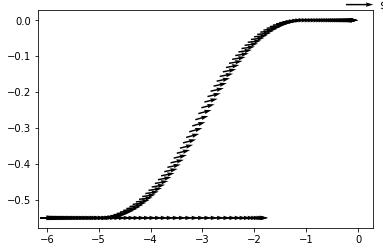

In [99]:
show_x_y(parallel_park)